<a href="https://colab.research.google.com/github/hwasser95/myhw/blob/main/day1_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# load the pandas library
import pandas as pd
import numpy as np

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# start by reading a set of sample data from github. This data contains data related to wines
filename = "https://raw.githubusercontent.com/hwasser95/myhw/main/Day1_Data%20-%20M2_Data%20(1).csv.csv"
df = pd.read_csv(filename)



#set up a clean copy as a safety for later
df_copy = df
df.head(10)

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.



i'm going to check for missing values. comparing the len to non-null

In [43]:
print(len(df))
df.info()

9568
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   EP      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


there do not appear to be missing values

I’m going to check different measures and see if anything sticks out

In [44]:
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [45]:
df.corr()

,T,V,AP,RH,EP
T,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
EP,-0.948128,-0.869780,0.518429,0.389794,1.000000



* the temperature and Exhaust Vacuum appear to be highly correlated
* we also see that Temperature is extremly uncorrelated to EP, it is close to -1, it has the biggest affect on the EP
*the Exhaust Vacuum is also highly uncorrelated
*Ambient Pressure and Relative Humidity are correlated to EP
```
# This is formatted as code
```



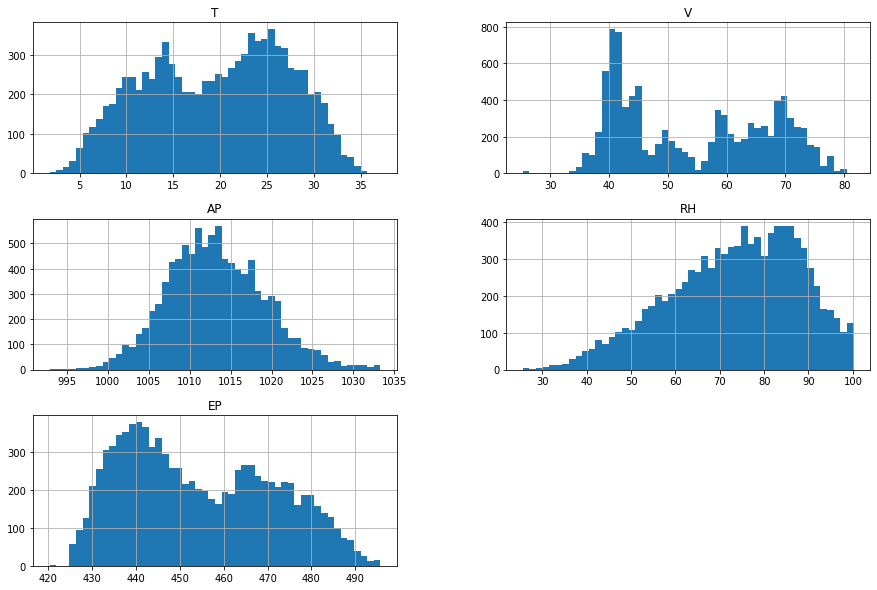

In [46]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
plt.show()


The distribution of the independent variables from the histograms above:

* Temperature has a Bimodal distribution
* Exhaust_vacuum has a Bimodal distribution
* Ambient_pressure has a roughly Normal distribution
* Relative_humidity has a Left Skewd distribution
- The distribution of the dependent variable from the histogram above:

* Net_hourly_electrical_energy_output has a Bimodal distribution
<br>
Since the dependent variable 'Net_hourly_electrical_energy_output' has a Bimodal distribution, it is likely that the independent variables 'Temperature' and 'Exhaust_vacuum' who also have a Bimodal distribution will be better predictors than the other two independent variables.


## #2

In [50]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
# I'm creating my x and y variables
y = df[['EP']].copy()
X = df.drop('EP', axis = 1)
# I will split the data into training and testing subsets. 
# I'll set aside 30% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
print("X_train size: " ,len(X_train))
print("X_test size: ", len(X_test))

# Assinging the model function to a variable
model = LinearRegression()

# fit the model using 10-fold cross validation;
scores = cross_val_score(model, X_train, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print ('c_v_scores',scores)
# calculate the average accuracy across all 10 folds
mn=np.mean(scores)
print ('mean = ',mn)

X_train size:  6697
X_test size:  2871
c_v_scores [0.91716153 0.93249273 0.92539274 0.92903747 0.93497881 0.9240207
 0.93374583 0.93074018 0.91945051 0.9288868 ]
mean =  0.9275907287106507


This model has a strong performance of 92.76%

I'm going to run another model with T and V. 
Their distrubutions seem to be similar to EP.
 I will drop AP and RH

In [51]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
# I'm creating my x and y variables
y = df[['EP']].copy()
X = df.drop(['EP','AP','RH'], axis = 1)
# I will split the data into training and testing subsets. 
# I'll set aside 30% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
print("X_train size: " ,len(X_train))
print("X_test size: ", len(X_test))

# Assinging the model function to a variable
model = LinearRegression()

# fit the model using 10-fold cross validation;
scores = cross_val_score(model, X_train, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print ('c_v_scores',scores)
# calculate the average accuracy across all 10 folds
mn=np.mean(scores)
print ('mean = ',mn)

X_train size:  6697
X_test size:  2871
c_v_scores [0.90125496 0.9188024  0.91232847 0.91858987 0.92210885 0.90963351
 0.91711569 0.91853757 0.91312528 0.91637728]
mean =  0.9147873877833836


This model also has a strong performance of 91.48%



Both models have a very similar cv score.
There is less than a 1.5% difference between models. It seems that AP and RH, have little effect on the EP
